In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
# read the csv file
dataset = pd.read_csv('~/Desktop/student_results.csv')
dataset

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international


In [8]:
# replace null value as 0 
dataset = dataset.replace(np.nan,0)
dataset

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international


In [9]:
# calculate the assessment,quiz,group,evaluation and exam respectively
Assessment = dataset["Assessment 1"]/10 + dataset["Assessment 2"]/10 + dataset["Assessment 3"]/10 + dataset["Assessment 4"]/10
Quiz = dataset["Online quiz 1 "]/10 + dataset["Online quiz 2"]/10 + dataset["Online quiz 3"]/10 + dataset["Online quiz 4"]/10
Group = dataset["Group assignment 1"]*0.08 + dataset["Group assignment 2"]*0.08 + dataset["Group assignment 3"]*0.08
Evaluation = dataset[" Group evaluation"]*1
Exam = dataset["Final exam"]*0.6
# create the new column call total marks which equal the sum of above
dataset['Total marks'] = Assessment + Quiz + Group + Evaluation + Exam
dataset

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total marks
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic,49.9216
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international,53.3840
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international,74.9846
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international,48.9490
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic,43.3050
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international,19.9142


/Users/shijiading/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


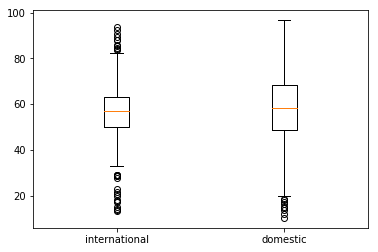

In [13]:
# V1,V2 filtered the total marks for international and domestic respectively 
V1 = dataset[(dataset['Student category']=='international') & (dataset['Total marks'] >= 0)]
V2 = dataset[(dataset['Student category']=='domestic') & (dataset['Total marks'] >= 0)]
# D1,D2 only store the value of total marks for international and domestic respectively
D1 = V1['Total marks']
D2 = V2['Total marks']
# create data store all D1,D2
data = [D1,D2]
# plot the boxplot
plt.boxplot(data)
# name the xaxis
plt.xticks([1,2],('international','domestic'))
plt.show()

In [17]:
# calculate the mean stdev and var for each class
group1 = dataset[["Class No","Total marks"]].groupby('Class No').mean()
group2 = dataset[["Class No","Total marks"]].groupby('Class No').std()
group3 = dataset[["Class No","Total marks"]].groupby('Class No').var()
# combine the class into one table
stattable = pd.concat([group1,group2,group3],axis=1)
# change the table name
stattable.columns = ['mean','stdev','variance']
stattable

,mean,stdev,variance
Class No,,,
1,59.280813,15.579171,242.710561
2,60.671069,12.655110,160.151821
3,57.610713,16.537712,273.495919
4,56.220069,17.861526,319.034109
5,57.918085,19.587666,383.676678
6,62.332600,15.875305,252.025294
7,54.879626,18.562187,344.554792
8,54.384800,18.936211,358.580091
9,53.918419,14.330264,205.356479


In [11]:
# grade each student
Grade = list()
for row in dataset['Total marks']:
    if row < 50:
        Grade.append('F')
    elif row < 65:
        Grade.append('P')
    elif row < 75:
        Grade.append('CR')
    elif row < 85:
        Grade.append('D')
    else:
        Grade.append('HD')

dataset['Grade'] = Grade
dataset

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total marks,Grade
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576,P
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472,CR
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968,F
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012,D
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic,49.9216,F
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international,53.3840,P
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international,74.9846,CR
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international,48.9490,F
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic,43.3050,F
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international,19.9142,F


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     61.55
Date:                Thu, 17 May 2018   Prob (F-statistic):           2.11e-14
Time:                        21:22:19   Log-Likelihood:                -2498.6
No. Observations:                 578   AIC:                             5001.
Df Residuals:                     576   BIC:                             5010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.0586      1.824     20.320      0.0

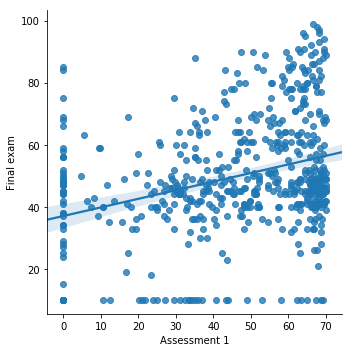

In [12]:
# plot the scatter plot
sns.lmplot("Assessment 1","Final exam",dataset)
# record x,y values
x = dataset["Assessment 1"]
y = dataset["Final exam"]
# perform regression test
results = smf.ols('y ~ x', data=dataset).fit()
print(results.summary())

In [27]:
# record x,z,m,n,y values
x = dataset["Assessment 1"]
z = dataset["Assessment 3"]
m = dataset["Online quiz 1 "]
n = dataset["Group assignment 2"]
y = dataset["Final exam"]
# perform multiple regression
results = smf.ols('y ~ x + z + m + n', data=dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     29.05
Date:                Thu, 17 May 2018   Prob (F-statistic):           5.21e-22
Time:                        19:38:23   Log-Likelihood:                -2474.6
No. Observations:                 578   AIC:                             4959.
Df Residuals:                     573   BIC:                             4981.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8300      2.377     10.866      0.0

In [16]:
# give status to each students 
Status = list()
for row in dataset["Grade"]:
    if row == "F":
        Status.append("Incomplete")
    else:
        Status.append("complete")

dataset["Status"] = Status
dataset

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total marks,Grade,Status
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576,P,complete
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472,CR,complete
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968,F,Incomplete
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012,D,complete
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic,49.9216,F,Incomplete
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international,53.3840,P,complete
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international,74.9846,CR,complete
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international,48.9490,F,Incomplete
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic,43.3050,F,Incomplete
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international,19.9142,F,Incomplete


In [17]:
# do the logistic regression
from sklearn.linear_model import LogisticRegression
Category = list()
for row in dataset["Status"]:
    if row == "Incomplete":
        Category.append("0")
    else:
        Category.append("1")

dataset["Category"] = Category
y = dataset.loc[0:99,'Category']
x = dataset.loc[0:99,'Assessment 3']
x = sm.add_constant(x)
logreg = LogisticRegression()
logreg.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# construct the confusion matrix
ytest = dataset.loc[100:,'Category']
xtest = dataset.loc[100:,'Assessment 3']
xtest = sm.add_constant(xtest)
yhat = logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,yhat)
confusion_matrix

array([[ 35,  90],
       [ 14, 339]])